## Data Wrangling, Exploratory Data Analysis, and Generating RFM Scores
This notebook contains the code for data wrangling and exploratory data analysis on the dataset in order to clean the data and cater to any missing values or data inconsistencies,, then we will explore the data by building different charts and doing some statistical testing. Finally, we will be generating RFM(Recency, Frequency, Monetary) scores for customer segmentation. 

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mano
import sklearn
from sklearn.impute import KNNImputer
import seaborn as sns

%matplotlib inline

In [2]:
#importing the dataset
df= pd.read_excel(r"C:\Users\HS LAPTOP\Desktop\iba\BI\MarketingProject\MarketingData\marketing_campaign.xlsx")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
#Looking at the shape of the dataset
df.shape

(2240, 29)

## Missing Values Analysis

In [4]:
#Seeing how many missings we have
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

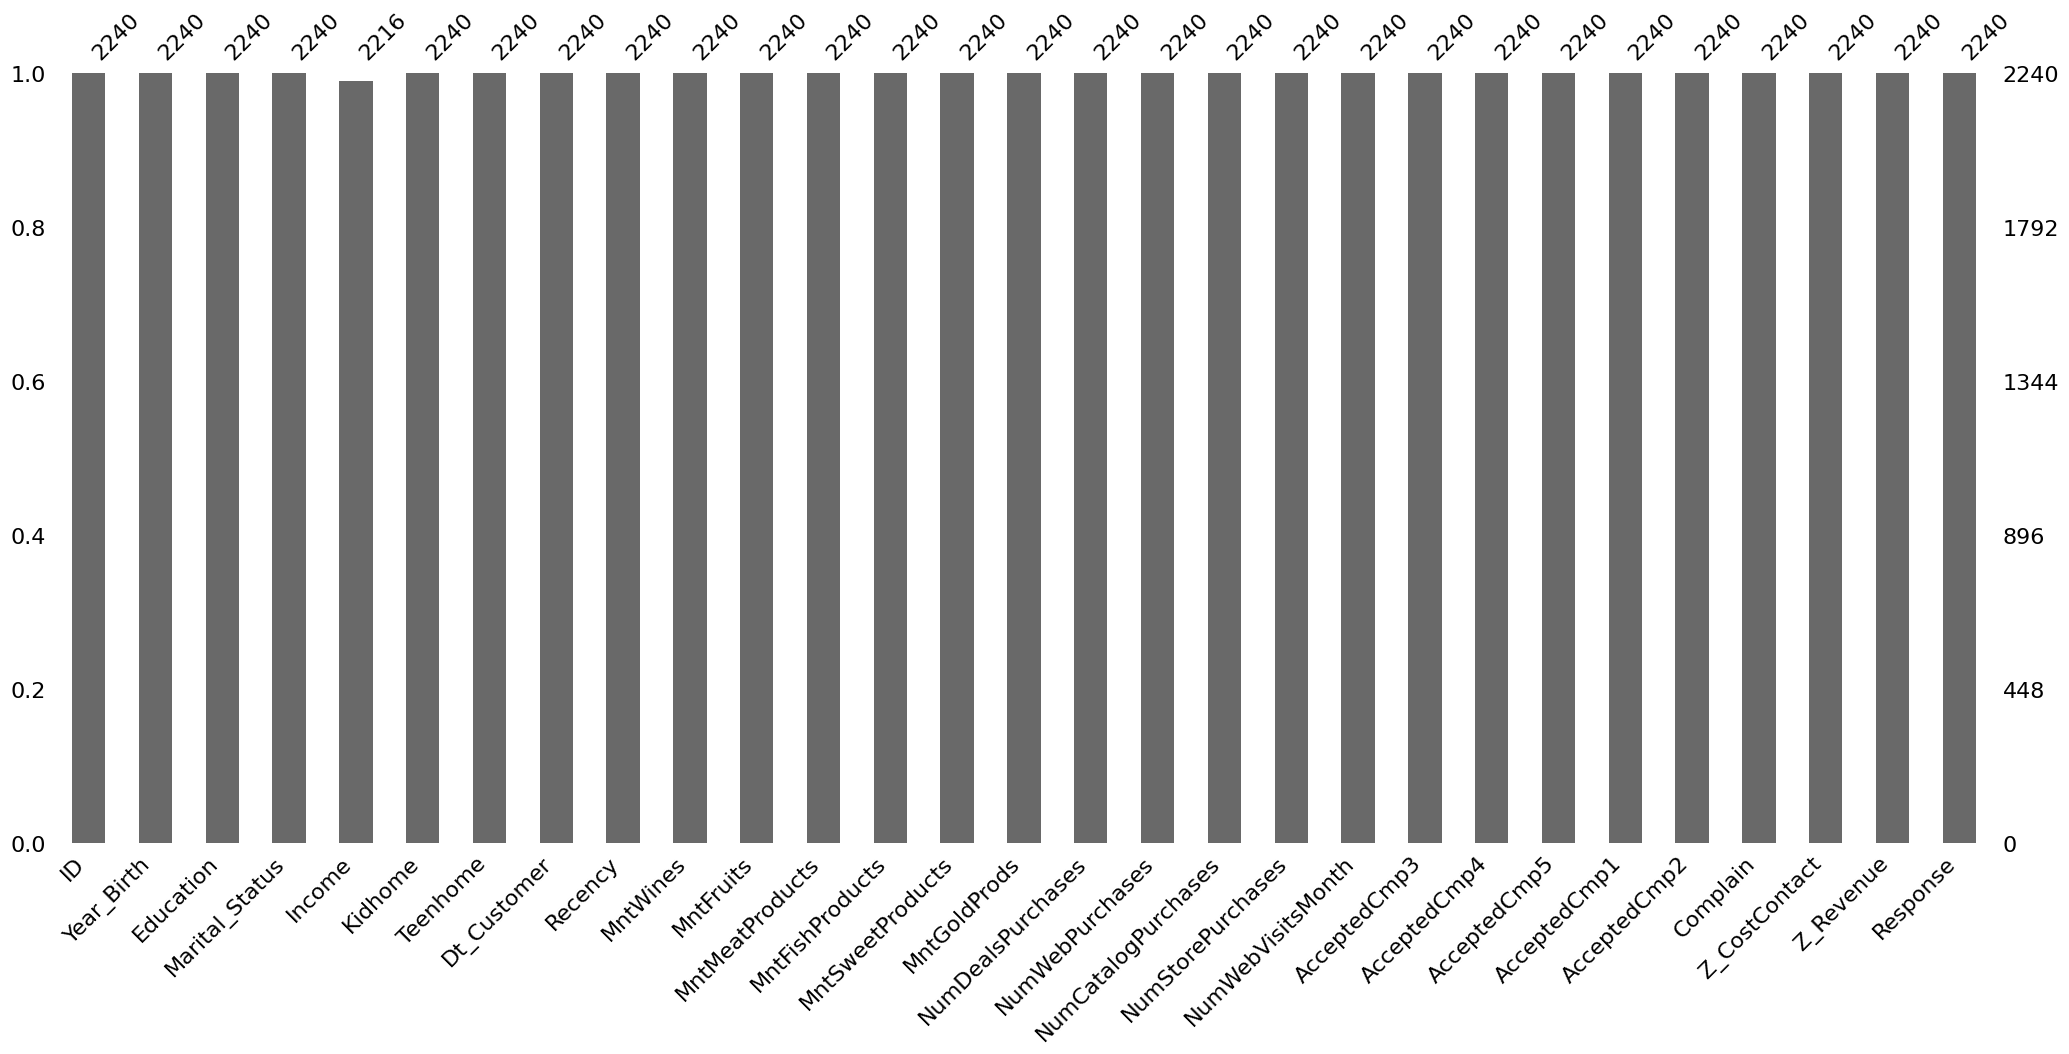

In [5]:
#visualizing missing values
mano.bar(df)

<Axes: >

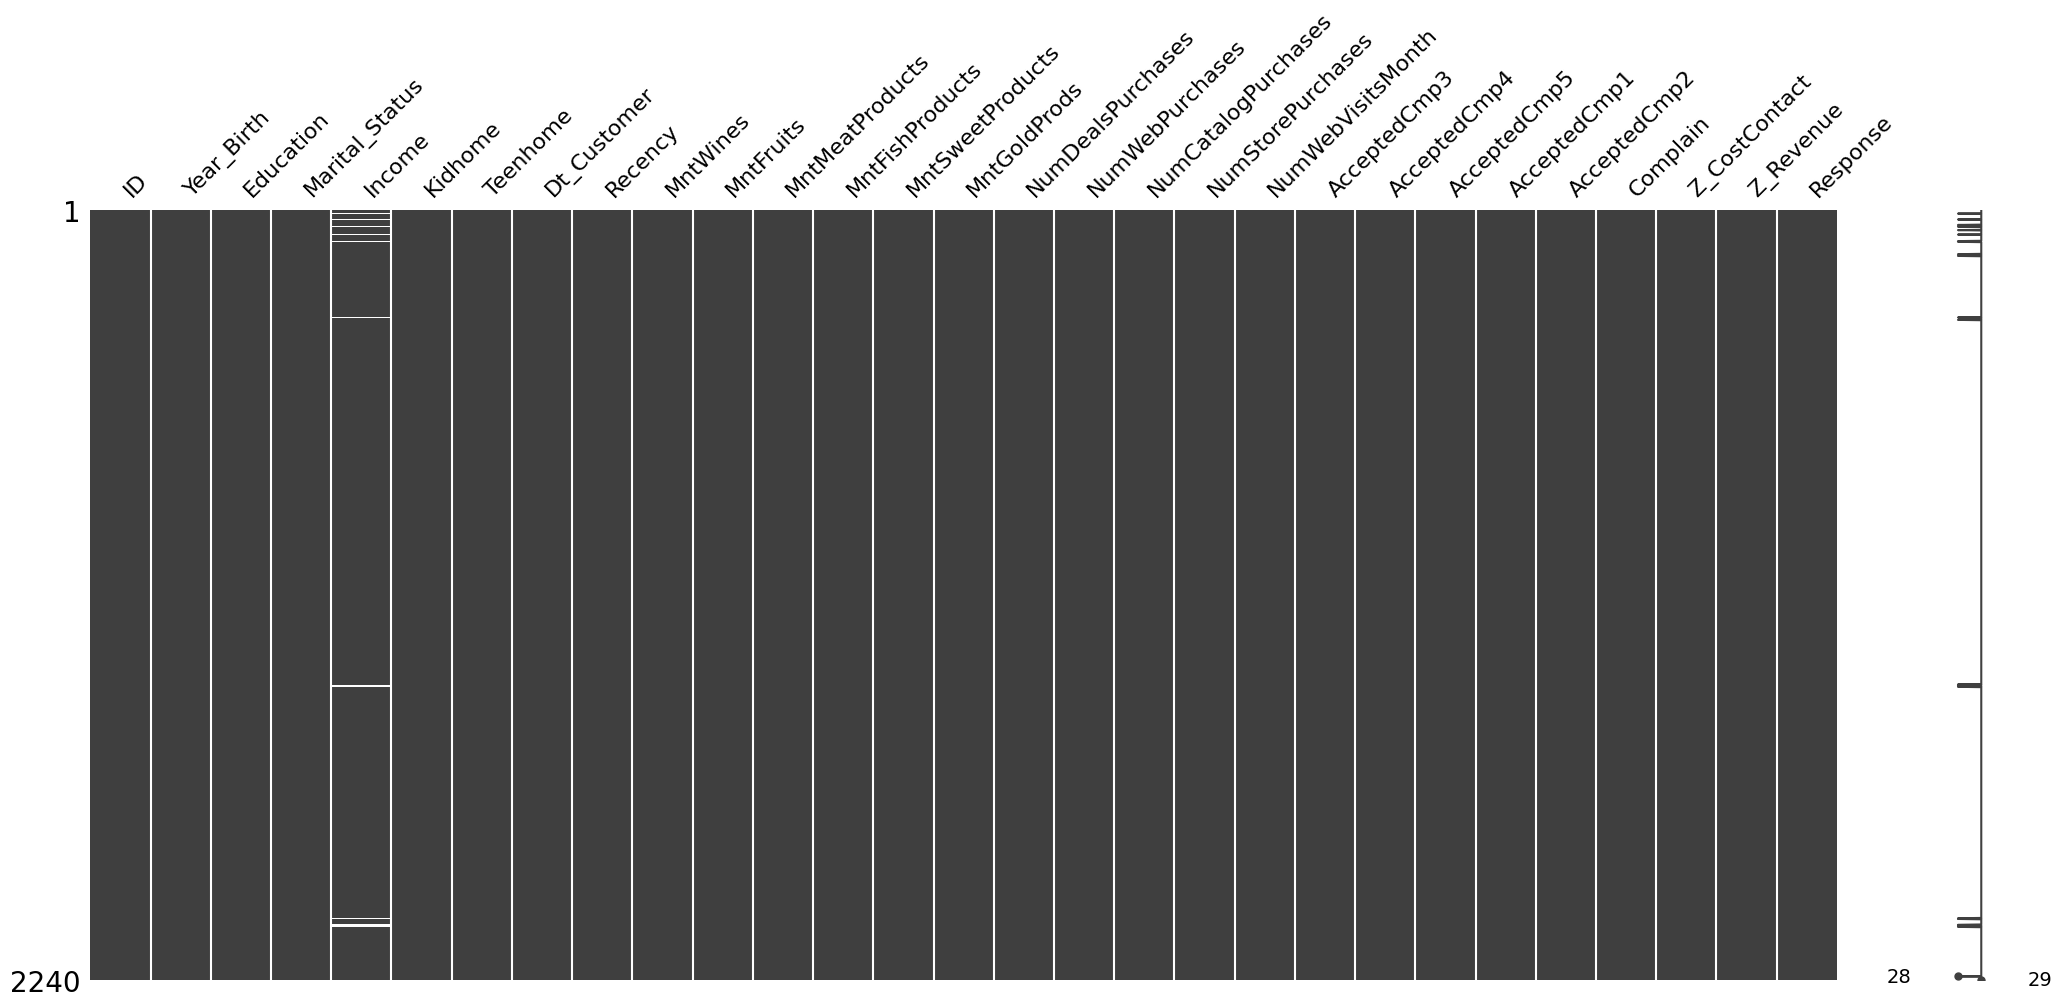

In [6]:
#looking at the pattern of missingness
mano.matrix(df)

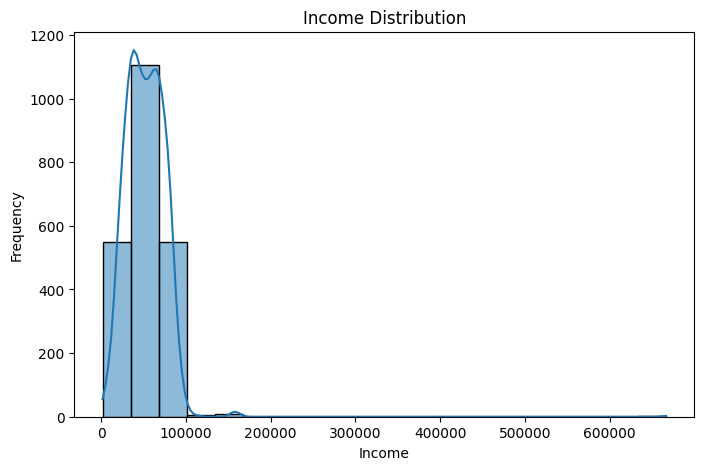

In [7]:
# Plot a histogram to see the distribution of income
plt.figure(figsize=(8, 5))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title(f'Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [8]:
#imputing values with KNN
imputer = KNNImputer (n_neighbors=10)
df[['Income']] = imputer.fit_transform(df[['Income']])


In [9]:
#checking missing values again
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

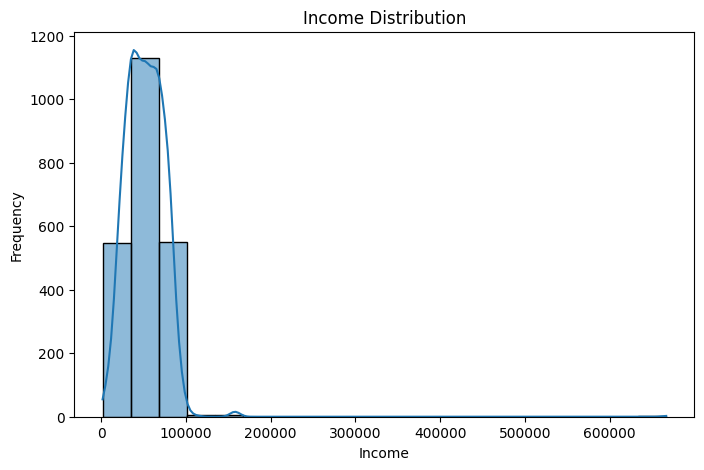

In [10]:
# Plot a histogram to see how the imputation affected the distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title(f'Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Catering to Data Inconsistencies

In [11]:
#Checking unique values to identify data inconsistencies
for column in df.columns:
    unique_values= df[column].unique()
    print(f"{column}:{unique_values}")

ID:[5524 2174 4141 ... 7270 8235 9405]
Year_Birth:[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Education:['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status:['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Income:[58138. 46344. 71613. ... 56981. 69245. 52869.]
Kidhome:[0 1 2]
Teenhome:[0 1 2]
Dt_Customer:['2012-09-04' '2014-03-08' '2013-08-21' '2014-02-10' '2014-01-19'
 '2013-09-09' '2012-11-13' '2013-05-08' '2013-06-06' '2014-03-13'
 '2013-11-15' '2012-10-10' '2012-11-24' '2012-12-24' '2012-08-31'
 '2013-03-28' '2012-11-03' '2012-08-08' '2013-01-06' '2012-12-23'
 '2014-01-11' '2013-03-18' '2013-01-02' '2013-05-27' '2013-02-20'
 '2013-05-31' '2013-11-22' '2014-05-22' '2013-05-11' '2012-10-29'
 '20

In [12]:
df['Z_Revenue']

0       11
1       11
2       11
3       11
4       11
        ..
2235    11
2236    11
2237    11
2238    11
2239    11
Name: Z_Revenue, Length: 2240, dtype: int64

In [13]:
df['Z_CostContact']

0       3
1       3
2       3
3       3
4       3
       ..
2235    3
2236    3
2237    3
2238    3
2239    3
Name: Z_CostContact, Length: 2240, dtype: int64

In [14]:
#Dropping columns with same value in all records
df.drop(columns=['Z_Revenue','Z_CostContact'], inplace=True)

In [15]:
#Catering to inconsistencies in Marital Status
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')


In [16]:
count_absurd = df['Marital_Status'].value_counts().get('Absurd', 0)
count_absurd

2

In [17]:
count_YOLO= df['Marital_Status'].value_counts().get('YOLO', 0)
count_YOLO

2

In [18]:
# Filter records with 'Marital_Status' as 'Absurd' or 'YOLO'
filtered_records = df[(df['Marital_Status'] == 'Absurd') | (df['Marital_Status'] == 'YOLO')]


filtered_records


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,10,7,1,0,0,1,1,0,0,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,5,6,2,0,0,0,0,0,0,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,1


In [19]:
df['Marital_Status'] = df['Marital_Status'].replace('Absurd', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('YOLO', 'Single')

In [20]:
count_2nCycle= df['Education'].value_counts().get('2n Cycle', 0)
count_2nCycle


203

# Exploratory Data Analysis
Now, we will explore distributions of different columns through different charts to better understand our data

In [21]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [22]:
#Creating a list of numerical columns
num_cols=['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

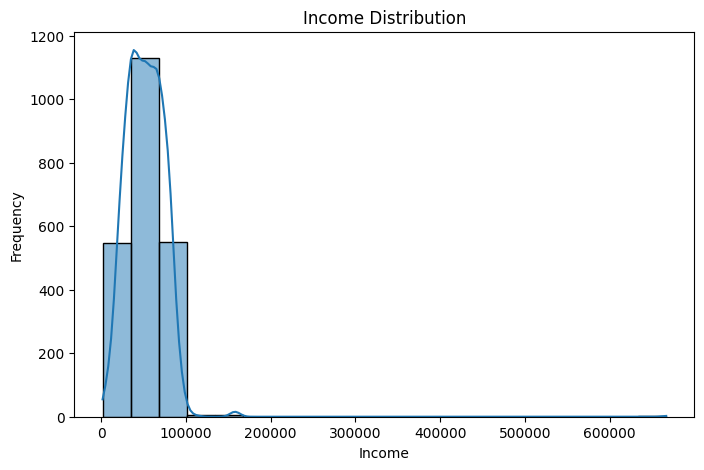

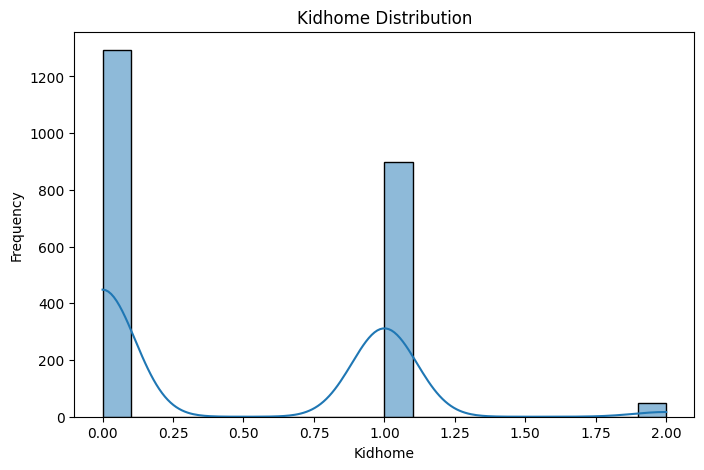

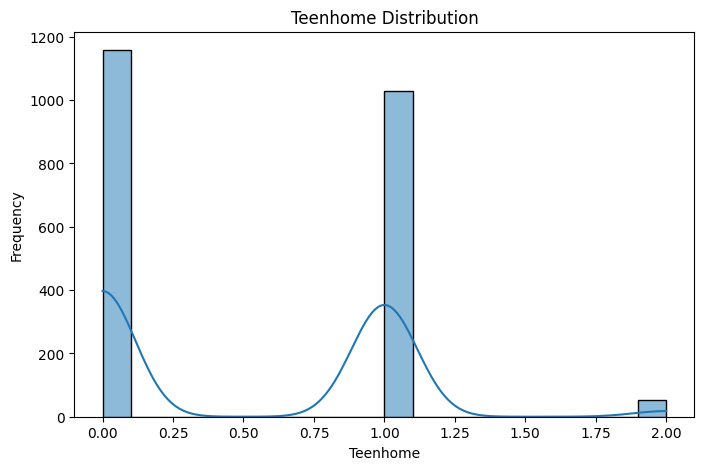

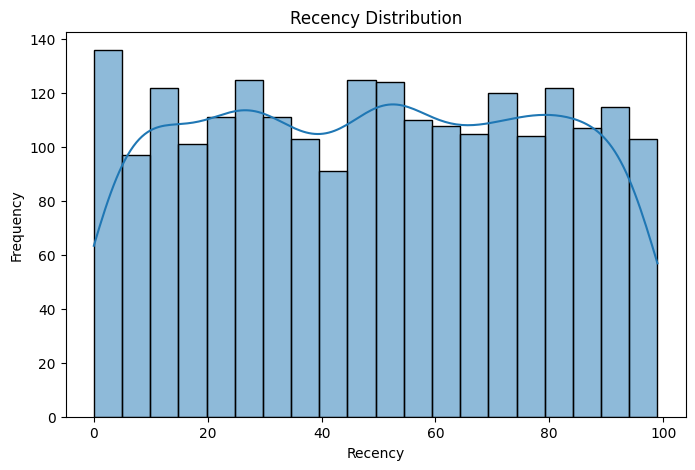

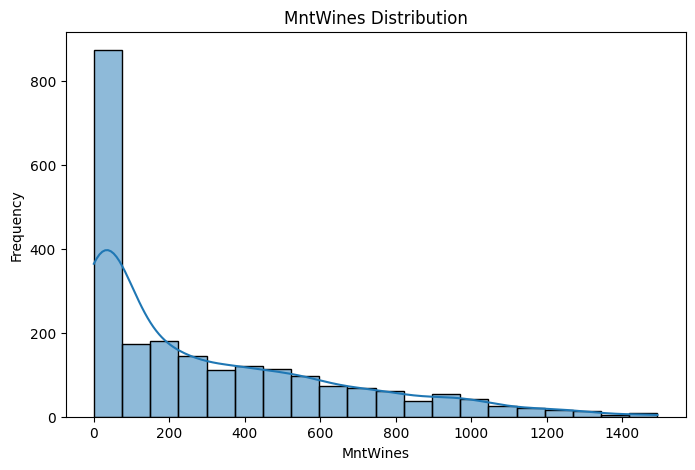

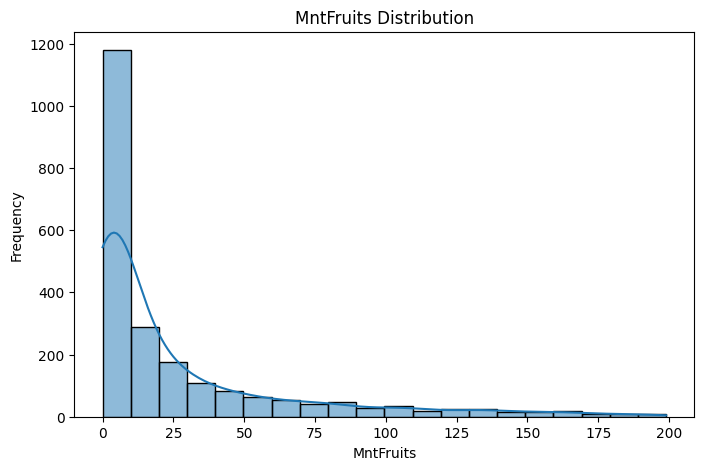

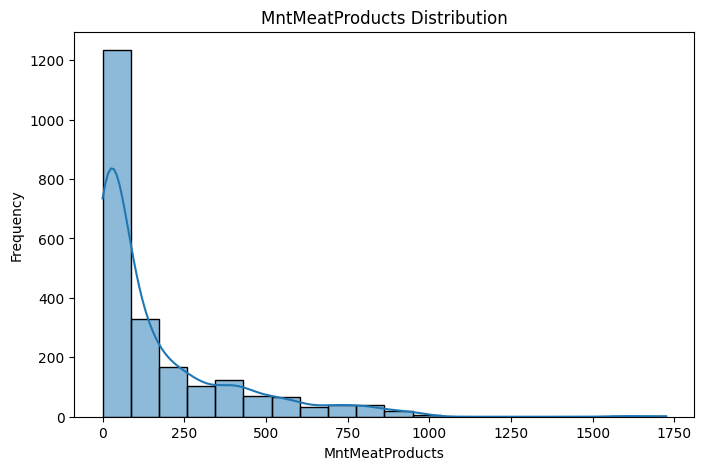

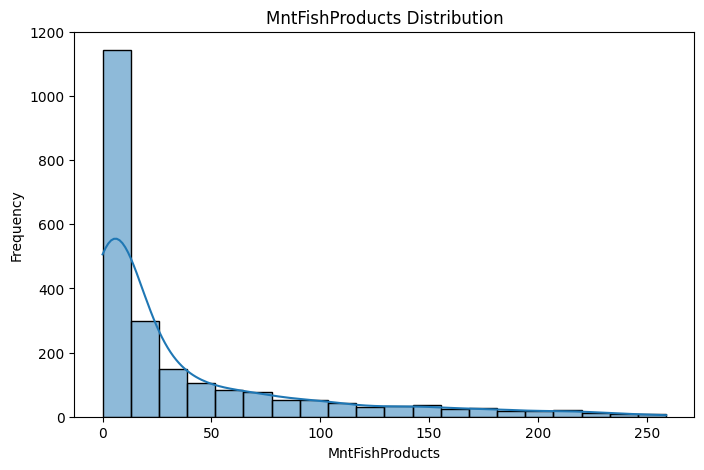

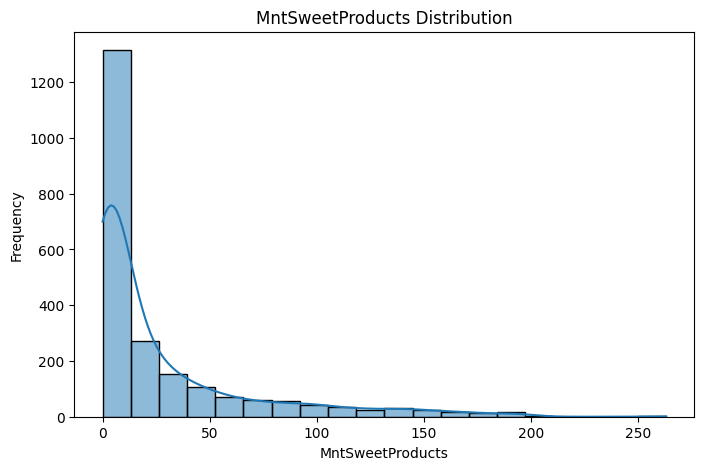

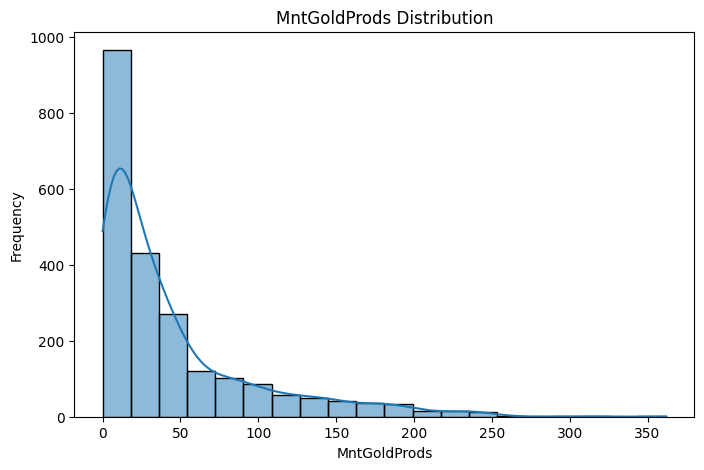

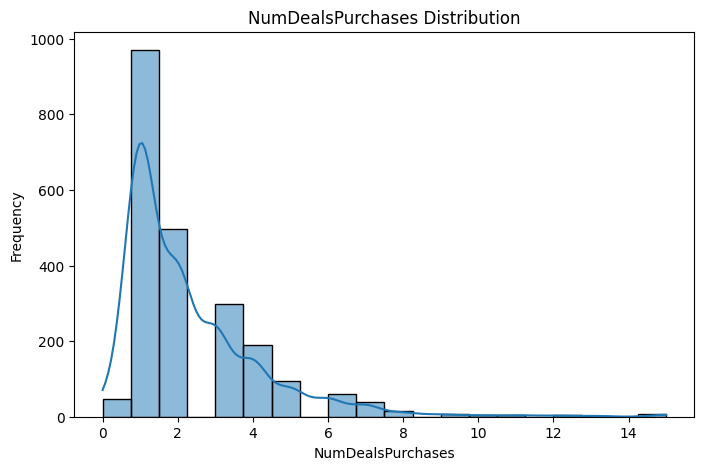

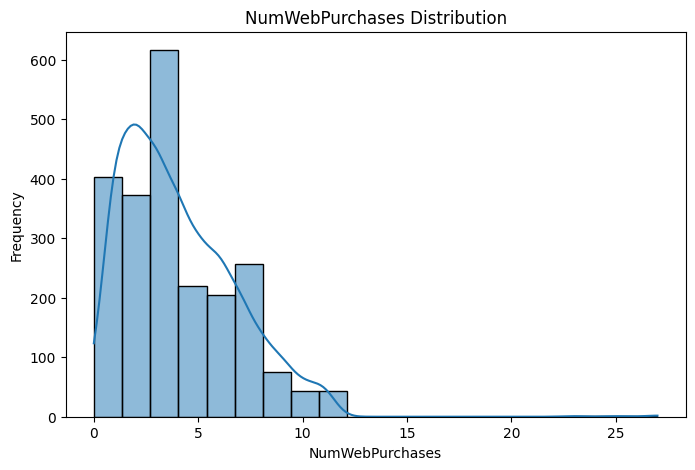

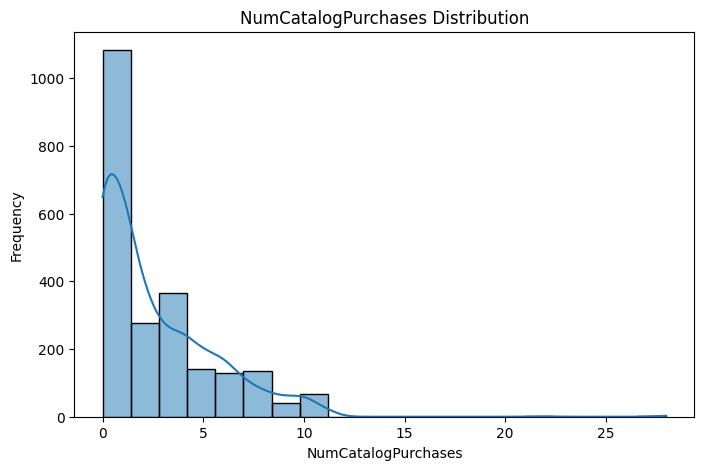

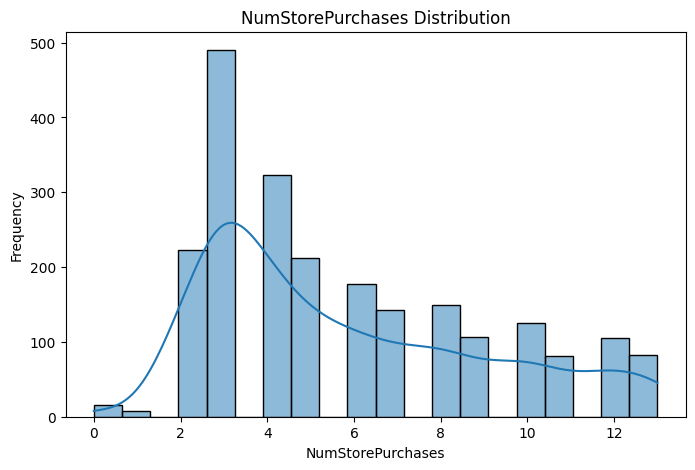

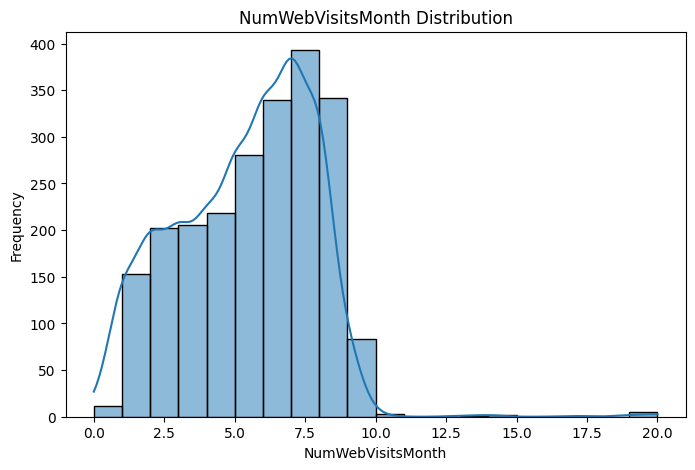

In [23]:
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [24]:
#create a list of campaign columns
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

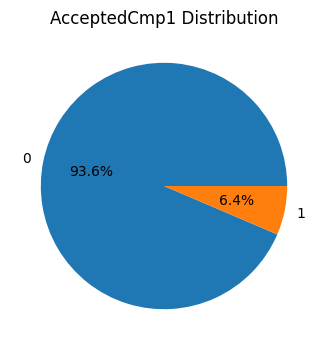

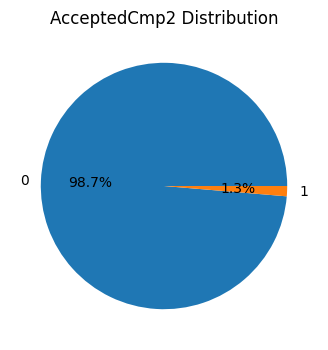

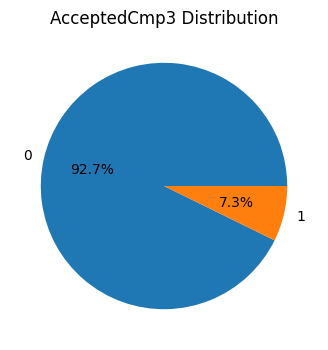

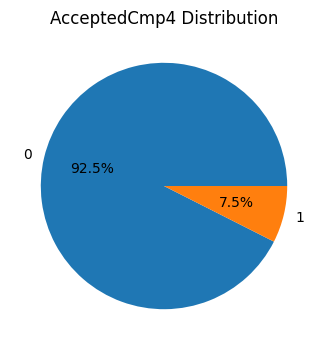

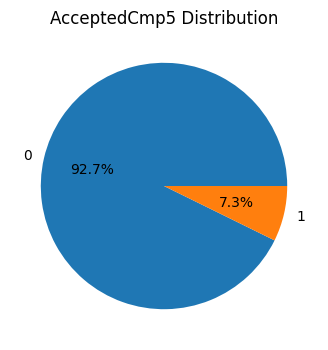

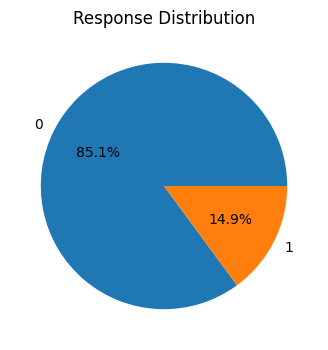

In [25]:
for col in campaign_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'{col} Distribution')
    plt.ylabel('')
    plt.show()

In [26]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

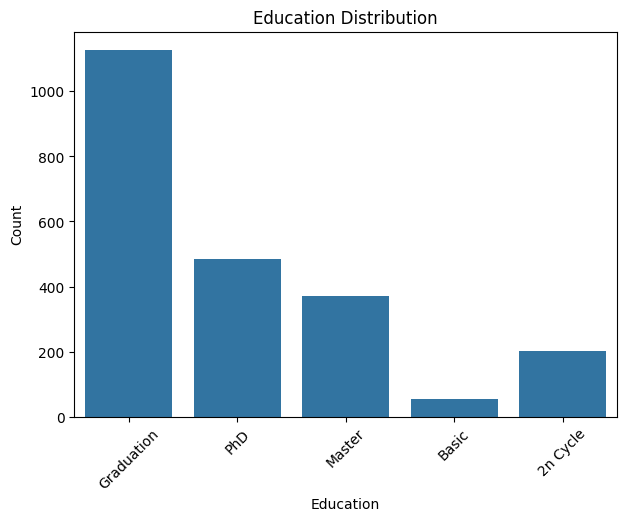

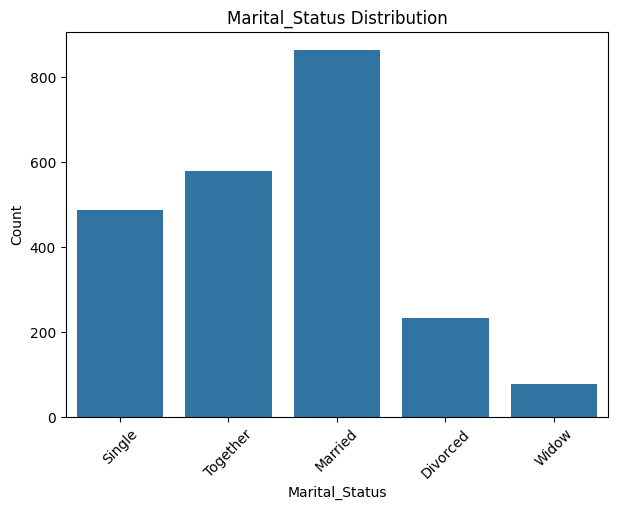

In [31]:
categorical_columns=['Education', 'Marital_Status']
for col in categorical_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show

In [30]:
correlation_matrix= df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Graduation'